In [1]:
# import libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals import joblib

# sklearn :: utils
from sklearn.model_selection import train_test_split

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# sklearn :: evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('../../Data/Processed/fifa19data_clean.csv')
print(df.columns)

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Position', 'Height', 'Weight',
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')


In [3]:
# group similar positions together
forward = ['RS', 'LS', 'RF', 'LF', 'CF', 'ST']

attack_mid = ['RAM', 'LAM', 'CAM']
wings = ['RM', 'RW', 'LM', 'LW']

central_mid = ['CM', 'LCM', 'RCM']
defensive_mid = ['CDM', 'LDM', 'RDM']

fullback = ['RB', 'RWB', 'LB', 'LWB']
cb_def = ['CB', 'LCB', 'RCB']

gk = ['GK']

In [4]:
# functions to run models

def model_training(model_name, model, X_train, y_train):
    model.fit(X_train, y_train)
    return model
    
def model_prediction(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred

def model_evaluation(model_name, y_test, y_pred):
    print(model_name)
    print('MAE', mean_absolute_error(y_test, y_pred))
    print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
    plt.title(model_name)
    plt.xlabel('True Value')
    plt.ylabel('Predicted Value')
    plt.show()
    print('')

def run_experiment(model_name, model, X_train, y_train, X_test, y_test):
    train_model = model_training(model_name, model, X_train, y_train)
    predictions = model_prediction(train_model, X_test)
    model_evaluation(model_name, y_test, predictions)
    return train_model, predictions

In [5]:
# create dataframes for each group of positions
df_gk = df[df['Position'] == 'GK']

df_fw = pd.DataFrame()
df_am = pd.DataFrame()
df_wings = pd.DataFrame()
df_cm = pd.DataFrame()
df_dm = pd.DataFrame()
df_fullback = pd.DataFrame()
df_cb = pd.DataFrame()

def aggregatePositions(df_pos, df_data, positions):
    for pos in positions:
        df_pos = pd.concat([df_pos, df_data[df_data['Position'] == pos]])
    return df_pos

df_fw = aggregatePositions(df_fw, df, forward)
df_am = aggregatePositions(df_am, df, attack_mid)
df_wings = aggregatePositions(df_wings, df, wings)
df_cm = aggregatePositions(df_cm, df, central_mid)
df_dm = aggregatePositions(df_dm, df, defensive_mid)
df_fullback = aggregatePositions(df_fullback, df, fullback)
df_cb = aggregatePositions(df_cb, df, cb_def)

In [6]:
X_columns = ['Dribbling', 'SprintSpeed','ShortPassing', 'LongPassing', 'Strength', 'Overall' ]
y_column = ['Overall']

In [7]:
X_fw = df_fw[list(set(X_columns) - set(['Overall']))]
X_am = df_am[list(set(X_columns) - set(['Overall']))]
X_wings = df_wings[list(set(X_columns) - set(['Overall']))]
X_cm = df_cm[list(set(X_columns) - set(['Overall']))]
X_dm = df_dm[list(set(X_columns) - set(['Overall']))]
X_fullback = df_fullback[list(set(X_columns) - set(['Overall']))]
X_cb = df_cb[list(set(X_columns) - set(['Overall']))]
X_gk = df_gk[list(set(X_columns) - set(['Overall']))]

y_fw = df_fw[y_column]
y_am = df_am[y_column]
y_wings = df_wings[y_column]
y_cm = df_cm[y_column]
y_dm = df_dm[y_column]
y_fullback = df_fullback[y_column]
y_cb = df_cb[y_column]
y_gk = df_gk[y_column]

In [8]:
X_fw

,LongPassing,ShortPassing,Strength,SprintSpeed,Dribbling
7,64.0,82.0,83.0,75.0,87.0
109,73.0,79.0,86.0,59.0,79.0
148,58.0,79.0,75.0,66.0,75.0
267,66.0,78.0,60.0,83.0,84.0
357,45.0,71.0,88.0,79.0,77.0
403,73.0,76.0,76.0,67.0,76.0
423,52.0,68.0,90.0,88.0,62.0
456,35.0,70.0,91.0,76.0,72.0
469,62.0,78.0,54.0,88.0,88.0
485,61.0,79.0,83.0,65.0,76.0


Forward:

X_forward_train (2133, 5)
y_forward_train (2133, 1)
X_forward_test (534, 5)
y_forward_test (534, 1)

Linear Regression - Forward
MAE 2.2671741694662613
RMSE 2.916547981947302


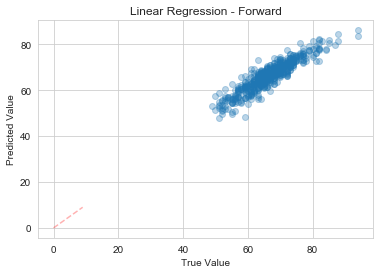


Random Forest Regression - Forward
MAE 2.409494382022472
RMSE 3.031082333484122


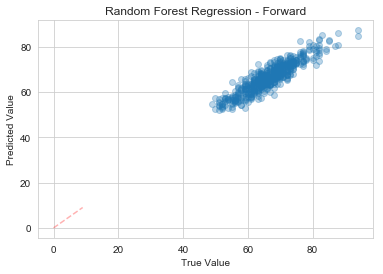


Attacking Midfield:

X_AM_train (800, 5)
y_AM_train (800, 1)
X_AM_test (200, 5)
y_AM_test (200, 1)

Linear Regression - Attacking Midfield
MAE 1.5636791416431566
RMSE 2.0901891357320053


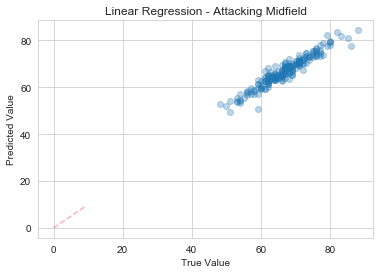


Random Forest Regression - Attacking Midfield
MAE 1.5566499999999996
RMSE 2.0672705434944887


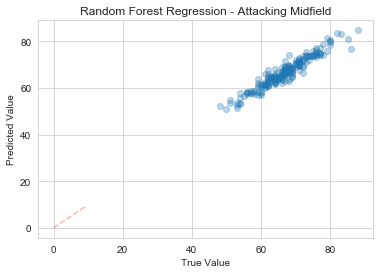


Wings:

X_wings_train (2376, 5)
y_wings_train (2376, 1)
X_wings_test (594, 5)
y_wings_test (594, 1)

Linear Regression - Wings
MAE 1.3937032856607319
RMSE 1.8510607453909609


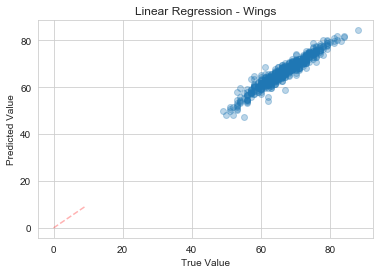


Random Forest Regression - Wings
MAE 1.479040404040404
RMSE 1.932282150661313


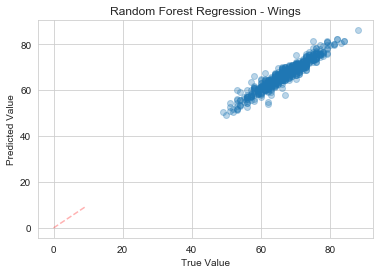


Central Midfield:

X_CM_train (1744, 5)
y_CM_train (1744, 1)
X_CM_test (436, 5)
y_CM_test (436, 1)

Linear Regression - Central Midfield
MAE 1.6973367505274968
RMSE 2.247379529174716


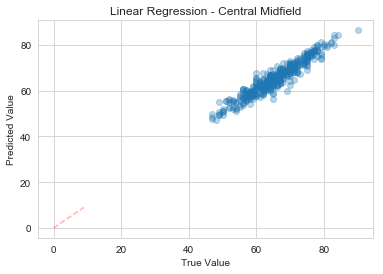


Random Forest Regression - Central Midfield
MAE 1.7314831804281348
RMSE 2.24657682739459


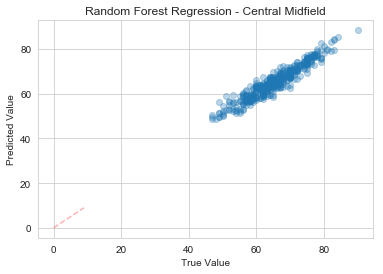


Defensive Midfield:

X_DM_train (1151, 5)
y_DM_train (1151, 1)
X_DM_test (288, 5)
y_DM_test (288, 1)

Linear Regression - Defensive Midfield
MAE 1.9180554120891347
RMSE 2.572462237152088


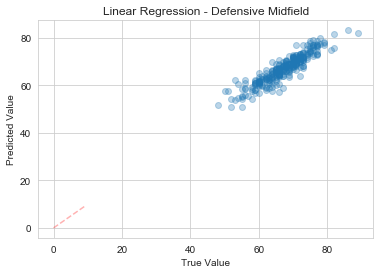


Random Forest Regression - Defensive Midfield
MAE 2.00528125
RMSE 2.5840292107105824


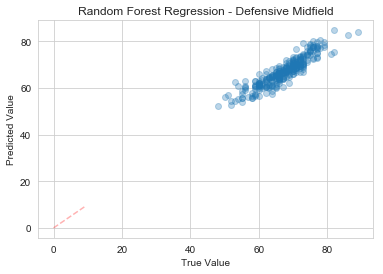


Fullback:

X_fullback_train (2222, 5)
y_fullback_train (2222, 1)
X_fullback_test (556, 5)
y_fullback_test (556, 1)

Linear Regression - Fullback
MAE 2.5523705669721335
RMSE 3.310595173343285


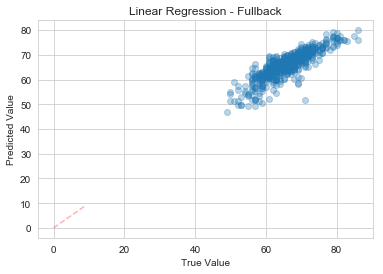


Random Forest Regression - Fullback
MAE 2.1700539568345327
RMSE 2.8321008992613805


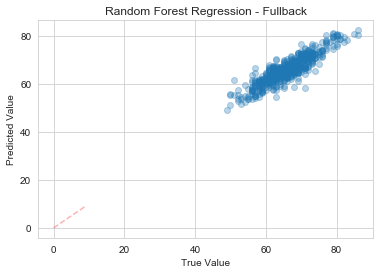


Centre Back:

X_CB_train (2470, 5)
y_CB_train (2470, 1)
X_CB_test (618, 5)
y_CB_test (618, 1)

Linear Regression - Centre Back
MAE 2.940620872872652
RMSE 3.7506433329862037


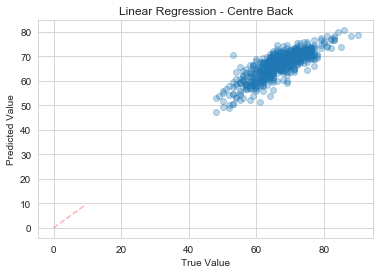


Random Forest Regression - Centre Back
MAE 2.848042071197411
RMSE 3.7081060291777788


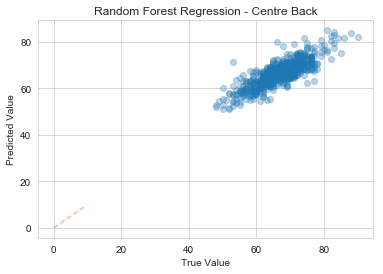


Goalkeeper:

X_GK_train (1151, 5)
y_GK_train (1151, 1)
X_GK_test (288, 5)
y_GK_test (288, 1)

Linear Regression - Goalkeeper
MAE 5.01746027927827
RMSE 6.167333454186847


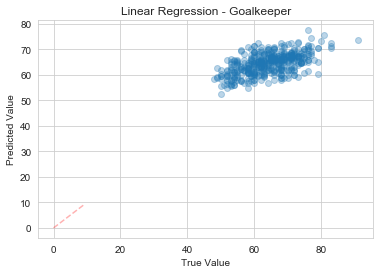


Random Forest Regression - Goalkeeper
MAE 4.948839506172839
RMSE 6.237874440132968


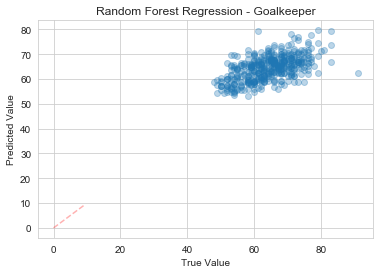

In [9]:
threshold = 0.8
# Forward
X_fw_train, X_fw_test, y_fw_train, y_fw_test = train_test_split(X_fw, y_fw, test_size=1.0-threshold, shuffle=True)

print('Forward:')
print('')
print('X_forward_train', X_fw_train.shape)
print('y_forward_train', y_fw_train.shape)
print('X_forward_test', X_fw_test.shape)
print('y_forward_test', y_fw_test.shape)
print('')

fw_LinReg_model, fw_LinReg_pred = run_experiment('Linear Regression - Forward', LinearRegression(), X_fw_train, y_fw_train, X_fw_test, y_fw_test)
fw_RF_model, fw_RF_pred = run_experiment('Random Forest Regression - Forward', RandomForestRegressor(100), X_fw_train, y_fw_train.values.ravel(), X_fw_test, y_fw_test)


# Attacking Midfield
X_am_train, X_am_test, y_am_train, y_am_test = train_test_split(X_am, y_am, test_size=1.0-threshold, shuffle=True)

print('Attacking Midfield:')
print('')
print('X_AM_train', X_am_train.shape)
print('y_AM_train', y_am_train.shape)
print('X_AM_test', X_am_test.shape)
print('y_AM_test', y_am_test.shape)
print('')

am_LinReg_model, am_LinReg_pred = run_experiment('Linear Regression - Attacking Midfield', LinearRegression(), X_am_train, y_am_train, X_am_test, y_am_test)
am_RF_model, am_RF_pred = run_experiment('Random Forest Regression - Attacking Midfield', RandomForestRegressor(100), X_am_train, y_am_train.values.ravel(), X_am_test, y_am_test)

# Wings
X_wings_train, X_wings_test, y_wings_train, y_wings_test = train_test_split(X_wings, y_wings, test_size=1.0-threshold, shuffle=True)

print('Wings:')
print('')
print('X_wings_train', X_wings_train.shape)
print('y_wings_train', y_wings_train.shape)
print('X_wings_test', X_wings_test.shape)
print('y_wings_test', y_wings_test.shape)
print('')

wings_LinReg_model, wings_LinReg_pred = run_experiment('Linear Regression - Wings', LinearRegression(), X_wings_train, y_wings_train, X_wings_test, y_wings_test)
wings_RF_model, wings_RF_pred = run_experiment('Random Forest Regression - Wings', RandomForestRegressor(100), X_wings_train, y_wings_train.values.ravel(), X_wings_test, y_wings_test)

# Central Midfield
X_cm_train, X_cm_test, y_cm_train, y_cm_test = train_test_split(X_cm, y_cm, test_size=1.0-threshold, shuffle=True)

print('Central Midfield:')
print('')
print('X_CM_train', X_cm_train.shape)
print('y_CM_train', y_cm_train.shape)
print('X_CM_test', X_cm_test.shape)
print('y_CM_test', y_cm_test.shape)
print('')

cm_LinReg_model, cm_LinReg_pred = run_experiment('Linear Regression - Central Midfield', LinearRegression(), X_cm_train, y_cm_train, X_cm_test, y_cm_test)
cm_RF_model, cm_RF_pred = run_experiment('Random Forest Regression - Central Midfield', RandomForestRegressor(100), X_cm_train, y_cm_train.values.ravel(), X_cm_test, y_cm_test)

# Defensive Midfield
X_dm_train, X_dm_test, y_dm_train, y_dm_test = train_test_split(X_dm, y_dm, test_size=1.0-threshold, shuffle=True)

print('Defensive Midfield:')
print('')
print('X_DM_train', X_dm_train.shape)
print('y_DM_train', y_dm_train.shape)
print('X_DM_test', X_dm_test.shape)
print('y_DM_test', y_dm_test.shape)
print('')

dm_LinReg_model, dm_LinReg_pred = run_experiment('Linear Regression - Defensive Midfield', LinearRegression(), X_dm_train, y_dm_train, X_dm_test, y_dm_test)
dm_RF_model, dm_RF_pred = run_experiment('Random Forest Regression - Defensive Midfield', RandomForestRegressor(100), X_dm_train, y_dm_train.values.ravel(), X_dm_test, y_dm_test)

# Fullback
X_fullback_train, X_fullback_test, y_fullback_train, y_fullback_test = train_test_split(X_fullback, y_fullback, test_size=1.0-threshold, shuffle=True)

print('Fullback:')
print('')
print('X_fullback_train', X_fullback_train.shape)
print('y_fullback_train', y_fullback_train.shape)
print('X_fullback_test', X_fullback_test.shape)
print('y_fullback_test', y_fullback_test.shape)
print('')

fullback_LinReg_model, fullback_LinReg_pred = run_experiment('Linear Regression - Fullback', LinearRegression(), X_fullback_train, y_fullback_train, X_fullback_test, y_fullback_test)
fullback_RF_model, fullback_RF_pred = run_experiment('Random Forest Regression - Fullback', RandomForestRegressor(100), X_fullback_train, y_fullback_train.values.ravel(), X_fullback_test, y_fullback_test)

# Centre Back
X_cb_train, X_cb_test, y_cb_train, y_cb_test = train_test_split(X_cb, y_cb, test_size=1.0-threshold, shuffle=True)

print('Centre Back:')
print('')
print('X_CB_train', X_cb_train.shape)
print('y_CB_train', y_cb_train.shape)
print('X_CB_test', X_cb_test.shape)
print('y_CB_test', y_cb_test.shape)
print('')

cb_LinReg_model, cb_LinReg_pred = run_experiment('Linear Regression - Centre Back', LinearRegression(), X_cb_train, y_cb_train, X_cb_test, y_cb_test)
cb_RF_model, cb_RF_pred = run_experiment('Random Forest Regression - Centre Back', RandomForestRegressor(100), X_cb_train, y_cb_train.values.ravel(), X_cb_test, y_cb_test)

# Goalkeeper
X_gk_train, X_gk_test, y_gk_train, y_gk_test = train_test_split(X_gk, y_gk, test_size=1.0-threshold, shuffle=True)

print('Goalkeeper:')
print('')
print('X_GK_train', X_dm_train.shape)
print('y_GK_train', y_dm_train.shape)
print('X_GK_test', X_dm_test.shape)
print('y_GK_test', y_dm_test.shape)
print('')

gk_LinReg_model, gk_LinReg_pred = run_experiment('Linear Regression - Goalkeeper', LinearRegression(), X_gk_train, y_gk_train, X_gk_test, y_gk_test)
gk_RF_model, gk_RF_pred = run_experiment('Random Forest Regression - Goalkeeper', RandomForestRegressor(100), X_gk_train, y_gk_train.values.ravel(), X_gk_test, y_gk_test)

In [10]:
joblib.dump(fw_RF_model, '../../Data/Model/Current/Forward_Model.pkl')
joblib.dump(wings_RF_model, '../../Data/Model/Current/Wings_Model.pkl')
joblib.dump(gk_RF_model, '../../Data/Model/Current/Gk_Model.pkl')
joblib.dump(cb_RF_model, '../../Data/Model/Current/Cb_Model.pkl')
joblib.dump(fullback_RF_model, '../../Data/Model/Current/Fullback_Model.pkl')
joblib.dump(dm_RF_model, '../../Data/Model/Current/Dm_Model.pkl')
joblib.dump(cm_RF_model, '../../Data/Model/Current/Cm_Model.pkl')
joblib.dump(am_RF_model, '../../Data/Model/Current/Am_Model.pkl')


['../../Data/Model/Current/Am_Model.pkl']

In [13]:
prediction = fw_RF_model.predict([[98,90,87,78,87]])
predicted_overall = prediction.round(1)[0]
print(predicted_overall)

89.0
